In [1]:
%matplotlib notebook


# Standard library imports
import logging

# Third party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from toolz import concat


# Local application imports
from myorbit.graphics_util import OrbitsPlot, calc_orbits_heliocentric_data, calc_interval, change_reference_frame
import myorbit.data_catalog as dc
from myorbit.two_body import calc_eph_planet
from myorbit.ephemeris_input import EphemrisInput
from myorbit.pert_cowels import calc_eph_by_cowells

%load_ext autoreload
%autoreload 2

### Given a list of object, plot its orbits around the Sun and ensure that they pass the perihelion

In [2]:
# First, the objects are specified
OBJS=['Earth','Ceres','Pallas','Juno','Vesta',dc.APOFIS]
# Second, the minimun and maximun perihelion passage time are calculated
tp_min, tp_max = calc_interval(OBJS)
# A EphemerisInput object is created with a date range that ensure that all the objects
# pass the perihelion
eph = EphemrisInput.from_mjds(tp_min-150, tp_max+150, "5 00.0", "J2000" )
print(eph)
# Next the orbits data is calculated
orbs, dfs, date_refs = calc_orbits_heliocentric_data(eph, OBJS)

Earth is a planet
     Equinox name: J2000
            T eq0: 0.0
        From date: 2008/10/05
          To date: 2023/08/31
         From MJD: 54744.41251951776
           To MJD: 60187.30596733968
      Step (days): 5.0


<IPython.core.display.Javascript object>


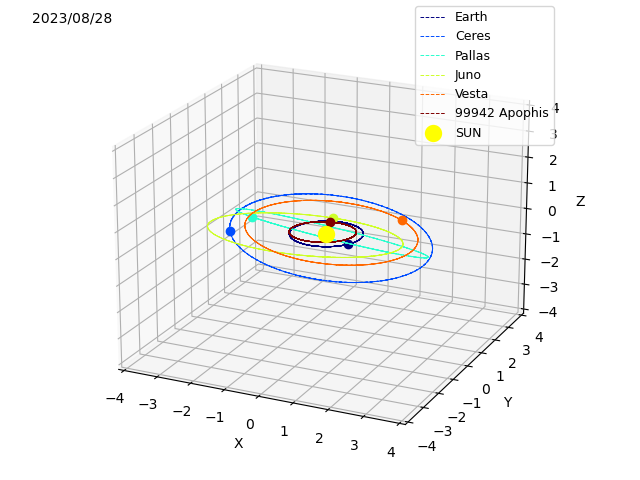

In [3]:
# The OrbitPlot is created with the data previosly calculated
LIMITS=(-4,4)
orbs_plot = OrbitsPlot(orbs, date_refs, LIMITS)
orbs_plot.start(interval=250)
plt.show()


### Given a list of object, plot its orbits around the Earth

In [4]:
# First, the objects are specified, Earth needs to be included so we can change the reference frame to Earth
OBJS=['Earth','Mars','Jupiter',dc.APOFIS]
# Second, the minimun and maximun perihelion passage time are calculated
tp_min, tp_max = calc_interval(OBJS)
# A EphemerisInput object is created with a date range that ensure that all the objects
# pass the perihelion
eph = EphemrisInput.from_mjds(tp_min-500, tp_max+500, "5 00.0", "J2000" )
print(eph)
# Next the orbits data is calculated
orbs, dfs, date_refs = calc_orbits_heliocentric_data(eph, OBJS)

Earth is a planet
Mars is a planet
Jupiter is a planet
     Equinox name: J2000
            T eq0: 0.0
        From date: 2007/10/21
          To date: 2010/07/17
         From MJD: 54394.41251951776
           To MJD: 55394.41251951776
      Step (days): 5.0


In [6]:
# A new orbs object is created changing the frame of reference to the Earth
orbs_from_earth = change_reference_frame(orbs, "Earth")

<IPython.core.display.Javascript object>


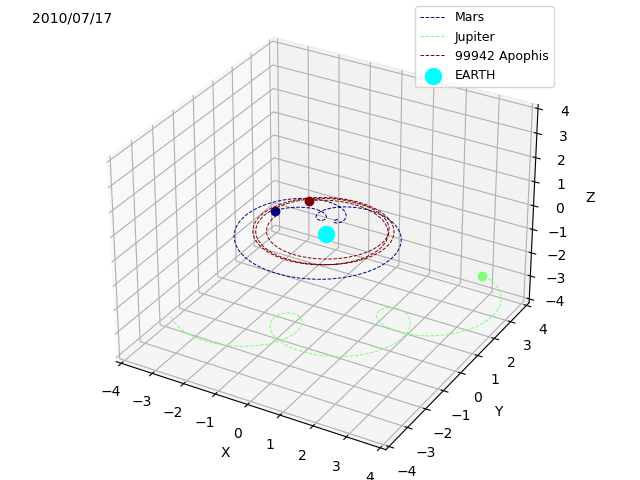

In [7]:
# The OrbitPlot is created with the data previosly calculated
LIMITS=(-4,4)
orbs_plot = OrbitsPlot(orbs_from_earth, date_refs, LIMITS, center_label='EARTH',center_color='cyan')
orbs_plot.start(interval=250)
plt.show()

### Given a list of object and a date range, plot its orbits around the Sun and next around Earth

     Equinox name: J2000
            T eq0: 0.0
        From date: 2027.01.01.0
          To date: 2030.12.01.0
         From MJD: 61406.0
           To MJD: 62836.0
      Step (days): 10.0


<IPython.core.display.Javascript object>


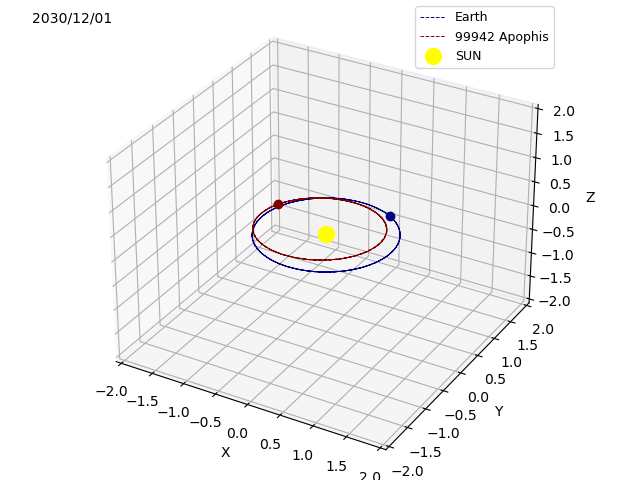

In [12]:
# First, the objects are specified, Earth needs to be included so we can change the reference frame to Earth
OBJS=['Earth',dc.APOFIS]
# The date range is set
eph = EphemrisInput(from_date="2027.01.01.0",
                    to_date = "2030.12.01.0",
                    step_dd_hh_hhh = "10 00.0",
                    equinox_name = "J2000")
print(eph)
# Next the orbits data is calculated
orbs_from_sun, dfs, date_refs = calc_orbits_heliocentric_data(eph, OBJS)

# The OrbitPlot is created with the data previosly calculated
LIMITS=(-2,2)
orbs_plot = OrbitsPlot(orbs_from_sun, date_refs, LIMITS)
orbs_plot.start(interval=250)
plt.show()

<IPython.core.display.Javascript object>


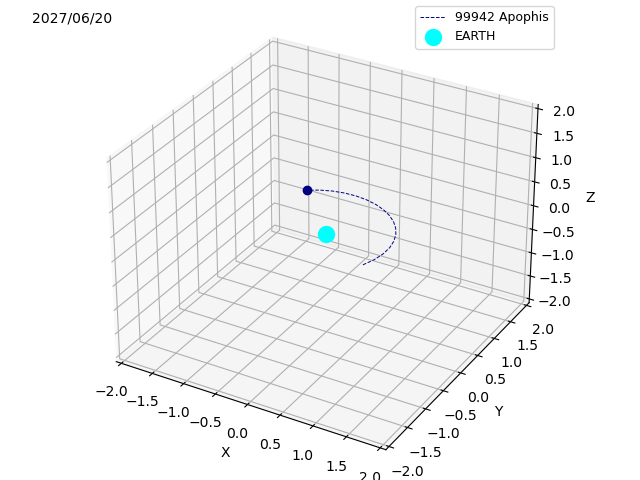

In [14]:
# 
LIMITS=(-2,2)
# A new orbs object is created changing the frame of reference to the Earth
orbs_from_earth = change_reference_frame(orbs_from_sun, "Earth")
orbs_plot = OrbitsPlot(orbs_from_earth, date_refs, LIMITS, center_label='EARTH',center_color='cyan')
orbs_plot.start(interval=250)
plt.show()